# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
print(cities)

['guerrero negro', 'atuona', 'mataura', 'nicosia', 'okato', 'saleaula', 'hami', 'sioux lookout', 'soe', 'hofn', 'kozlovo', 'atar', 'macau', 'port hardy', 'beringovskiy', 'vila velha', 'ushuaia', 'lasa', 'chokurdakh', 'kitgum', 'kieta', 'butaritari', 'klaksvik', 'ponta do sol', 'alofi', 'bathsheba', 'inirida', 'liberal', 'kapaa', 'hobart', 'qaanaaq', 'esperance', 'taolanaro', 'rikitea', 'punta arenas', 'karata', 'vaini', 'amderma', 'barrow', 'palmer', 'thompson', 'vaitupu', 'karratha', 'busselton', 'dikson', 'nikolskoye', 'avarua', 'chimore', 'husavik', 'kambi', 'bluff', 'constitucion', 'naryan-mar', 'abiramam', 'aden', 'tuktoyaktuk', 'hilo', 'ahipara', 'cherskiy', 'yarada', 'albany', 'ndende', 'mys shmidta', 'mehamn', 'hermanus', 'komsomolskiy', 'skibbereen', 'asau', 'teknaf', 'luwuk', 'cape town', 'sambava', 'hearst', 'saskylakh', 'ambodifototra', 'villa del rosario', 'kemijarvi', 'saldanha', 'port lincoln', 'puerto palomas', 'nizhneyansk', 'tura', 'economy', 'egvekinot', 'ouallam', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#call url
url ='http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key


In [5]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c28a9b25760ceac92e78e81be41bd29a'

In [6]:
#create lists for all columns
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed =[]
country = []
date = [] 


#set city count
city_count = 1

for city in cities:
    try:
        response = (requests.get(url + '&q=' + city)).json()
        city_list.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'City number {city_count} of {len(cities)} complete. | {city}')
        city_count = city_count + 1
    
        
            
    except KeyError:
        print("City not found. Processing...")
        city_count = city_count + 1
print("------------------------------\nData Retrieval Complete\n------------------------------")



City number 1 of 623 complete. | guerrero negro
City number 2 of 623 complete. | atuona
City number 3 of 623 complete. | mataura
City number 4 of 623 complete. | nicosia
City number 5 of 623 complete. | okato
City not found. Processing...
City number 7 of 623 complete. | hami
City number 8 of 623 complete. | sioux lookout
City number 9 of 623 complete. | soe
City number 10 of 623 complete. | hofn
City number 11 of 623 complete. | kozlovo
City number 12 of 623 complete. | atar
City number 13 of 623 complete. | macau
City number 14 of 623 complete. | port hardy
City number 15 of 623 complete. | beringovskiy
City number 16 of 623 complete. | vila velha
City number 17 of 623 complete. | ushuaia
City number 18 of 623 complete. | lasa
City number 19 of 623 complete. | chokurdakh
City number 20 of 623 complete. | kitgum
City number 21 of 623 complete. | kieta
City number 22 of 623 complete. | butaritari
City number 23 of 623 complete. | klaksvik
City number 24 of 623 complete. | ponta do sol


City number 196 of 623 complete. | svetlyy
City number 197 of 623 complete. | upernavik
City number 198 of 623 complete. | souillac
City number 199 of 623 complete. | shambu
City number 200 of 623 complete. | iqaluit
City number 201 of 623 complete. | jamestown
City not found. Processing...
City not found. Processing...
City number 204 of 623 complete. | anadyr
City not found. Processing...
City number 206 of 623 complete. | isla vista
City number 207 of 623 complete. | cedral
City number 208 of 623 complete. | comodoro rivadavia
City number 209 of 623 complete. | cassilandia
City not found. Processing...
City number 211 of 623 complete. | luangwa
City number 212 of 623 complete. | east london
City number 213 of 623 complete. | chuy
City number 214 of 623 complete. | ola
City number 215 of 623 complete. | balkanabat
City number 216 of 623 complete. | tsiroanomandidy
City number 217 of 623 complete. | walvis bay
City number 218 of 623 complete. | deputatskiy
City number 219 of 623 compl

City not found. Processing...
City not found. Processing...
City number 387 of 623 complete. | sangar
City number 388 of 623 complete. | smolenka
City number 389 of 623 complete. | west plains
City number 390 of 623 complete. | kloulklubed
City number 391 of 623 complete. | kharp
City number 392 of 623 complete. | srednekolymsk
City not found. Processing...
City number 394 of 623 complete. | yerbogachen
City number 395 of 623 complete. | jizan
City number 396 of 623 complete. | kununurra
City number 397 of 623 complete. | chimbote
City not found. Processing...
City number 399 of 623 complete. | fairbanks
City number 400 of 623 complete. | sadon
City number 401 of 623 complete. | shimoda
City number 402 of 623 complete. | ippy
City not found. Processing...
City number 404 of 623 complete. | tazovskiy
City number 405 of 623 complete. | faya
City number 406 of 623 complete. | angoche
City number 407 of 623 complete. | teguise
City number 408 of 623 complete. | letterkenny
City number 409 

City number 577 of 623 complete. | san quintin
City number 578 of 623 complete. | fort saint james
City number 579 of 623 complete. | baryatino
City number 580 of 623 complete. | bonthe
City number 581 of 623 complete. | kibre mengist
City number 582 of 623 complete. | litomerice
City number 583 of 623 complete. | nantucket
City number 584 of 623 complete. | hampton
City number 585 of 623 complete. | noumea
City number 586 of 623 complete. | kathu
City number 587 of 623 complete. | morvi
City number 588 of 623 complete. | san antonio
City number 589 of 623 complete. | henties bay
City number 590 of 623 complete. | tezu
City number 591 of 623 complete. | malinyi
City number 592 of 623 complete. | road town
City number 593 of 623 complete. | buchanan
City number 594 of 623 complete. | kavaratti
City number 595 of 623 complete. | aboso
City number 596 of 623 complete. | dutse
City number 597 of 623 complete. | cockburn town
City number 598 of 623 complete. | riyadh
City number 599 of 623 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
city_weather = {
    "City": city_list,
    "Lat": lat,
    "Lng": lng,
    "Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date   
}
weather_all= pd.DataFrame(city_weather)
weather_all

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,67.73,64,0,14.29,MX,1635091451
1,Atuona,-9.8000,-139.0333,77.81,74,19,18.10,PF,1635091451
2,Mataura,-46.1927,168.8643,49.24,98,91,0.54,NZ,1635091451
3,Nicosia,35.1667,33.3667,71.08,56,20,12.66,CY,1635091451
4,Okato,-39.2000,173.8833,53.69,94,100,8.52,NZ,1635091452
...,...,...,...,...,...,...,...,...,...
572,Lastoursville,-0.8143,12.7287,78.96,89,62,0.16,GA,1635091635
573,Wewak,-3.5534,143.6268,79.18,83,100,4.54,PG,1635091635
574,Krasnyy Oktyabr',56.1167,38.8833,33.76,77,98,12.53,RU,1635091365
575,Morwa,22.9000,73.8333,75.45,57,40,7.34,IN,1635091636


In [35]:
weather_all.describe()

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.222196,16.028923,60.935130,70.901213,56.440208,7.593917,1.635092e+09
std,32.510438,90.687453,22.132346,20.113280,38.031287,5.670216,9.067143e+01
min,-54.800000,-179.166700,-11.470000,9.000000,0.000000,0.000000,1.635091e+09
25%,-4.276100,-66.895800,47.160000,61.000000,18.000000,3.510000,1.635091e+09
50%,22.285500,20.040300,65.440000,74.000000,68.000000,6.330000,1.635092e+09
75%,47.599900,96.128500,78.870000,86.000000,95.000000,10.180000,1.635092e+09
max,78.218600,179.316700,100.890000,100.000000,100.000000,42.570000,1.635092e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
weather_all.loc[weather_all['Humidity'] > 100]

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature')

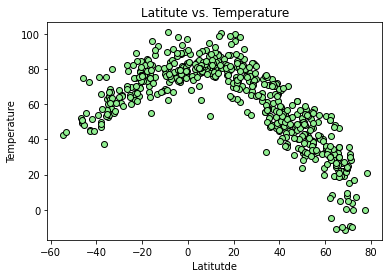

In [37]:
plt.scatter(weather_all['Lat'], weather_all['Temp'], marker="o", facecolors="lightgreen", edgecolors="black")
plt.title("Latitute vs. Temperature")
plt.xlabel("Latitutde")
plt.ylabel("Temperature")



## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

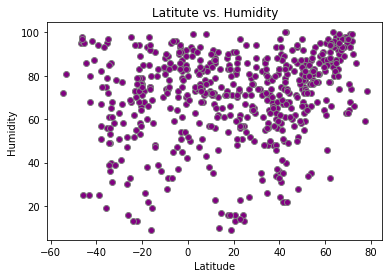

In [38]:
plt.scatter(weather_all['Lat'], weather_all['Humidity'], marker="o", facecolors="purple", edgecolors="grey")
plt.title("Latitute vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

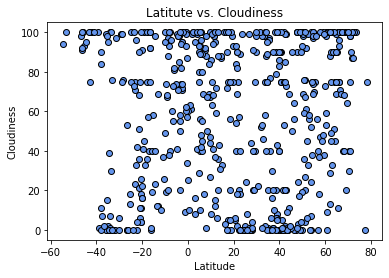

In [39]:
plt.scatter(weather_all['Lat'], weather_all['Cloudiness'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.title("Latitute vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

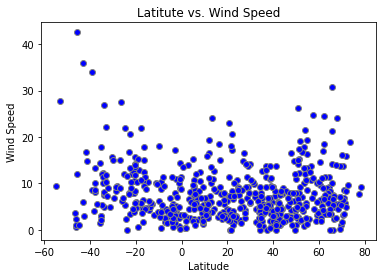

In [40]:
plt.scatter(weather_all['Lat'], weather_all['Wind Speed'], marker="o", facecolors="blue", edgecolors="grey")
plt.title("Latitute vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

### Observable Trends

* As expected, cities with latitudes closer to 0 have higher temperatures compared to those who are further from 0. 
* There is not a strong correlation between latitude and wind speed or cloudiness.
* Humidity appears to be the lowest nearest to the equator.

## Linear Regression

In [41]:
#define hemispheres
northhem_df = weather_all.loc[(weather_all['Lat']>0)]
southhem_df = weather_all.loc[(weather_all['Lat'] < 0)]

####  Northern Hemisphere -  Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.03x + 95.09.
The r-squared is: -0.8890852788455399


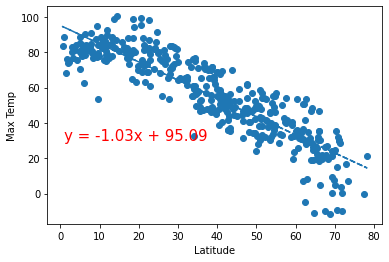

In [42]:
x = northhem_df['Lat']
y = northhem_df['Temp']

slope, intercept, r_value, p_value, stderr = linregress(x, y)
m_fit = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}.")
print(f"The r-squared is: {r_value}")

plt.scatter(x,y)
plt.plot(x, m_fit,"--")
plt.annotate(line_eq, (1, 30),fontsize=15, color ="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.69x + 85.61.
The r-squared is: 0.7547258746737319


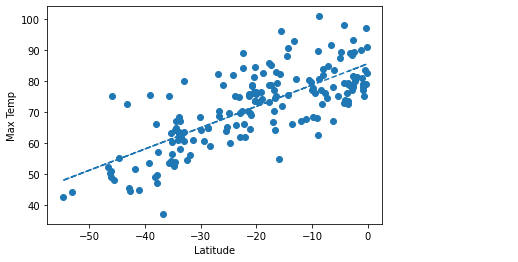

In [43]:
x = southhem_df['Lat']
y = southhem_df['Temp']

slope, intercept, r_value, p_value, stderr = linregress(x, y)
m_fit = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}.")
print(f"The r-squared is: {r_value}")

plt.scatter(x,y)
plt.plot(x, m_fit,"--")
plt.annotate(line_eq, (1, 30),fontsize=15, color ="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

#### Observable Trend

* There is a strong correlation bewteen temperature and latitude. As the latitude increases and decreases, the temperature decreases. Because the hottest point is at the equator and the equator is at 0 latitude, we can confirm this correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 62.82.
The r-squared is: 0.26253422434465973


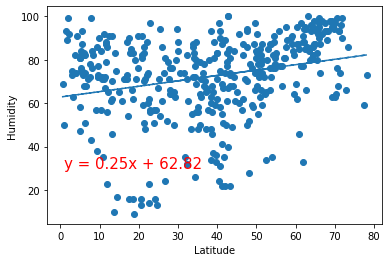

In [17]:
x = northhem_df['Lat']
y = northhem_df['Humidity']

slope, intercept, r_value, p_value, stderr = linregress(x, y)
m_fit = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}.")
print(f"The r-squared is: {r_value}")

plt.scatter(x,y)
plt.plot(x, m_fit,"--")
plt.annotate(line_eq, (1, 30),fontsize=15, color ="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 70.75.
The r-squared is: 0.08910007381740313


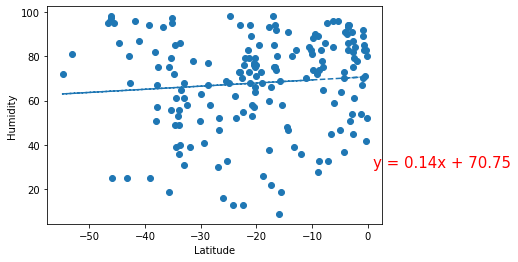

In [18]:
x = southhem_df['Lat']
y = southhem_df['Humidity']

slope, intercept, r_value, p_value, stderr = linregress(x, y)
m_fit = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}.")
print(f"The r-squared is: {r_value}")

plt.scatter(x,y)
plt.plot(x, m_fit,"--")
plt.annotate(line_eq, (1, 30),fontsize=15, color ="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#### Observable Trend
* There is not a strong correlation between latitude and humidity. However, the lowest humidities appear to be closer to the equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.22x + 48.11.
The r-squared is: 0.11560498637008297


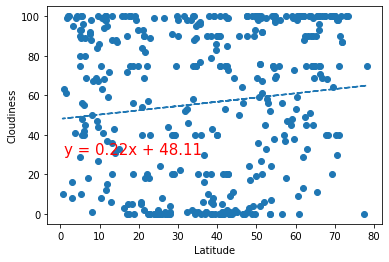

In [19]:
x = northhem_df['Lat']
y = northhem_df['Cloudiness']

slope, intercept, r_value, p_value, stderr = linregress(x, y)
m_fit = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}.")
print(f"The r-squared is: {r_value}")

plt.scatter(x,y)
plt.plot(x, m_fit,"--")
plt.annotate(line_eq, (1, 30),fontsize=15, color ="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 70.75.
The r-squared is: 0.08910007381740313


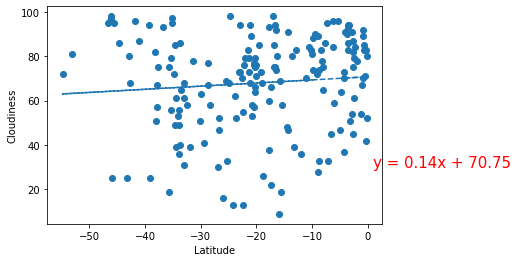

In [20]:
x = southhem_df['Lat']
y = southhem_df['Humidity']

slope, intercept, r_value, p_value, stderr = linregress(x, y)
m_fit = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}.")
print(f"The r-squared is: {r_value}")

plt.scatter(x,y)
plt.plot(x, m_fit,"--")
plt.annotate(line_eq, (1, 30),fontsize=15, color ="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#### Observable Trend

* There is no clear correlation between cloudiness and latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 6.11.
The r-squared is: 0.10817093465603683


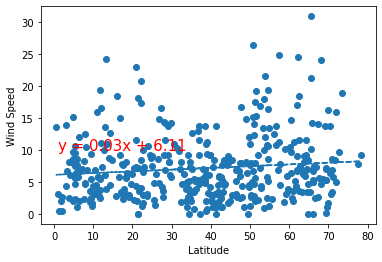

In [21]:
x = northhem_df['Lat']
y = northhem_df['Wind Speed']

slope, intercept, r_value, p_value, stderr = linregress(x, y)
m_fit = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}.")
print(f"The r-squared is: {r_value}")

plt.scatter(x,y)
plt.plot(x, m_fit,"--")
plt.annotate(line_eq, (1,10),fontsize=15, color ="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.16x + 5.36.
The r-squared is: -0.33725357376451687


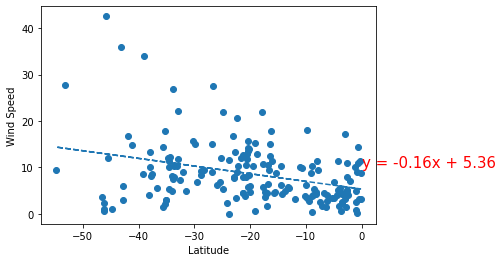

In [22]:
x = southhem_df['Lat']
y = southhem_df['Wind Speed']

slope, intercept, r_value, p_value, stderr = linregress(x, y)
m_fit = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}.")
print(f"The r-squared is: {r_value}")

plt.scatter(x,y)
plt.plot(x, m_fit,"--")
plt.annotate(line_eq, (0, 10),fontsize=15, color ="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

#### Observable Trend
* There is no correlation between wind speed and latitude in the northern hempisphere. However, most cities seem to have similar wind speeds.
* There is a weak correlation between latitude and wind speed in the southern hemisphere with a cluster of cities closer to 0 having little to no winds. 

In [45]:
weather_all.to_csv("weather_all.csv", encoding='utf-8', index=False)